In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
giubc = pd.read_csv('internet_usage.csv')

In [3]:
giubc.tail()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
212,Virgin Islands (U.S.),VIR,13.8151,18.3758,27.4944,27.4291,27.377,27.3443,27.3326,27.3393,...,50.07,54.8391,59.6083,64.3775,..,..,..,..,..,..
213,West Bank and Gaza,PSE,1.11131,1.83685,3.10009,4.13062,4.4009,16.005,18.41,21.176,...,53.6652,56.7,59.9,63.3,64.4,70.6226,76.01,81.83,88.6469,86.6377
214,"Yemen, Rep.",YEM,0.0825004,0.0908025,0.518796,0.604734,0.881223,1.0486,1.24782,5.01,...,22.55,24.0854,24.5792,26.7184,..,..,13.8152,14.8881,17.6948,..
215,Zambia,ZMB,0.191072,0.23313,0.477751,0.980483,1.1,1.3,1.6,1.9,...,6.5,8.8,10.3,12.2,14.3,18.7,24.4992,26.9505,31.2342,..
216,Zimbabwe,ZWE,0.401434,0.799846,1.1,1.8,2.1,2.4,2.4,3,...,16.3647,22.7428,23.12,24.4,25,26.5883,29.2986,32.4616,32.5615,..


In [4]:
giubc.shape

(217, 26)

In [5]:
giubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  217 non-null    object
 1   Country Code  217 non-null    object
 2   2000          217 non-null    object
 3   2001          217 non-null    object
 4   2002          217 non-null    object
 5   2003          217 non-null    object
 6   2004          217 non-null    object
 7   2005          217 non-null    object
 8   2006          217 non-null    object
 9   2007          217 non-null    object
 10  2008          217 non-null    object
 11  2009          217 non-null    object
 12  2010          217 non-null    object
 13  2011          217 non-null    object
 14  2012          217 non-null    object
 15  2013          217 non-null    object
 16  2014          217 non-null    object
 17  2015          217 non-null    object
 18  2016          217 non-null    object
 19  2017    

In [6]:
years_Columns = giubc.columns[2:] #select all column except Contry Name & Country Code

In [7]:
# Data preprocessing -Drop non-numeric columns 
giubc[years_Columns] = giubc[years_Columns].apply(pd.to_numeric, errors='coerce') #convert strings to numeric

In [8]:
giubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  217 non-null    object 
 1   Country Code  217 non-null    object 
 2   2000          196 non-null    float64
 3   2001          199 non-null    float64
 4   2002          202 non-null    float64
 5   2003          196 non-null    float64
 6   2004          199 non-null    float64
 7   2005          200 non-null    float64
 8   2006          199 non-null    float64
 9   2007          204 non-null    float64
 10  2008          202 non-null    float64
 11  2009          202 non-null    float64
 12  2010          201 non-null    float64
 13  2011          204 non-null    float64
 14  2012          202 non-null    float64
 15  2013          201 non-null    float64
 16  2014          201 non-null    float64
 17  2015          200 non-null    float64
 18  2016          203 non-null    

In [9]:
 giubc.isnull().sum()

Country Name      0
Country Code      0
2000             21
2001             18
2002             15
2003             21
2004             18
2005             17
2006             18
2007             13
2008             15
2009             15
2010             16
2011             13
2012             15
2013             16
2014             16
2015             17
2016             14
2017             11
2018             41
2019             31
2020             25
2021             27
2022             34
2023            158
dtype: int64

In [10]:
giubc = giubc.dropna(subset=years_Columns, how='all') #drop rows with all NaN in years columns

In [11]:
giubc.isnull().sum()

Country Name      0
Country Code      0
2000             14
2001             11
2002              8
2003             14
2004             11
2005             10
2006             11
2007              6
2008              8
2009              8
2010              9
2011              6
2012              8
2013              9
2014              9
2015             10
2016              7
2017              4
2018             34
2019             24
2020             18
2021             20
2022             27
2023            151
dtype: int64

In [12]:
giubc = giubc.fillna(giubc.mean(numeric_only=True)) #fill nan with mean

In [13]:
giubc.isnull().sum()

Country Name    0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
dtype: int64

In [14]:
giubc.duplicated().sum()

0

In [15]:
giubc.sample(5)

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
91,"Iran, Islamic Rep.",IRN,0.934190,1.484220,4.62618,6.93372,7.4900,8.100000,8.7600,9.4700,...,39.3536,45.3350,53.2268,64.0440,70.200600,72.4509,75.5699,78.5957,81.7170,87.666746
55,Dominica,DMA,8.814840,13.245200,18.42490,23.62040,30.3196,38.543600,39.3982,40.2745,...,57.5000,65.0000,67.0300,69.6197,57.863789,73.3819,75.6567,82.3506,83.3767,87.666746
181,St. Kitts and Nevis,KNA,5.862810,7.714730,21.15240,22.96980,24.7377,34.000000,38.5000,43.5000,...,65.4000,66.2000,67.0000,67.8000,68.600000,69.4000,70.2753,69.1294,76.4575,87.666746
117,"Macao SAR, China",MAC,13.608600,22.521200,25.17190,25.74210,31.4841,34.862900,46.4000,47.3270,...,69.7809,77.6001,81.6430,83.1741,83.794100,86.4679,87.4623,88.4681,89.7864,87.666746
193,Timor-Leste,TLS,8.732304,10.653857,0.00000,0.00000,0.0000,0.099032,0.5000,1.0000,...,17.5000,18.6000,21.2000,24.2000,27.600000,28.0046,32.0127,35.5407,40.7521,87.666746


In [16]:
# Assuming the first column is "Country" and the rest are years (2000, 2001, ...)
df_countries = giubc.iloc[:, [0]]  # First column (Country names)
df_years = giubc.iloc[:, 2:]       # Remaining columns (Years)

In [17]:
df_countries

,Country Name
0,Afghanistan
1,Albania
2,Algeria
4,Andorra
5,Angola
...,...
212,Virgin Islands (U.S.)
213,West Bank and Gaza
214,"Yemen, Rep."
215,Zambia


In [18]:
type(df_countries)

pandas.core.frame.DataFrame

In [19]:
arr = df_countries.to_numpy().reshape(-1)

In [20]:
arr

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French

In [21]:
df_years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,8.732304,0.004723,0.004561,0.087891,0.105809,1.22415,2.10712,1.90000,1.8400,3.5500,...,7.0000,8.2600,11.0000,13.5000,16.800000,17.600000,18.40000,67.88072,71.291703,87.666746
1,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.60999,15.03610,23.8600,41.2000,...,54.3000,56.9000,59.6000,62.4000,65.400000,68.550400,72.23770,79.32370,82.613700,83.135600
2,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.37598,9.45119,10.1800,11.2300,...,29.5000,38.2000,42.9455,47.6911,49.038500,58.977600,60.65340,66.23560,71.243200,87.666746
4,10.538800,10.653857,11.260500,13.546400,26.838000,37.60580,48.93680,70.87000,70.0400,78.5300,...,86.1000,87.9000,89.7000,91.5675,57.863789,90.718700,93.20560,93.89750,94.485500,87.666746
5,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.50000,1.70000,1.9000,2.3000,...,21.3623,22.0000,23.2000,26.0000,29.000000,32.129400,36.63470,37.80670,39.293500,87.666746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,13.815100,18.375800,27.494400,27.429100,27.377000,27.34430,27.33260,27.33930,27.3618,27.3965,...,50.0700,54.8391,59.6083,64.3775,57.863789,61.250281,64.49232,67.88072,71.291703,87.666746
213,1.111310,1.836850,3.100090,4.130620,4.400900,16.00500,18.41000,21.17600,24.3580,32.2300,...,53.6652,56.7000,59.9000,63.3000,64.400000,70.622600,76.01000,81.83000,88.646900,86.637700
214,0.082500,0.090802,0.518796,0.604734,0.881223,1.04860,1.24782,5.01000,6.8900,9.9600,...,22.5500,24.0854,24.5792,26.7184,57.863789,61.250281,13.81520,14.88810,17.694800,87.666746
215,0.191072,0.233130,0.477751,0.980483,1.100000,1.30000,1.60000,1.90000,2.2000,2.5000,...,6.5000,8.8000,10.3000,12.2000,14.300000,18.700000,24.49920,26.95050,31.234200,87.666746


In [22]:
df_combined = pd.concat([df_countries, df_years], axis=1)

In [23]:
df_combined

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,8.732304,0.004723,0.004561,0.087891,0.105809,1.22415,2.10712,1.90000,1.8400,...,7.0000,8.2600,11.0000,13.5000,16.800000,17.600000,18.40000,67.88072,71.291703,87.666746
1,Albania,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.60999,15.03610,23.8600,...,54.3000,56.9000,59.6000,62.4000,65.400000,68.550400,72.23770,79.32370,82.613700,83.135600
2,Algeria,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.37598,9.45119,10.1800,...,29.5000,38.2000,42.9455,47.6911,49.038500,58.977600,60.65340,66.23560,71.243200,87.666746
4,Andorra,10.538800,10.653857,11.260500,13.546400,26.838000,37.60580,48.93680,70.87000,70.0400,...,86.1000,87.9000,89.7000,91.5675,57.863789,90.718700,93.20560,93.89750,94.485500,87.666746
5,Angola,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.50000,1.70000,1.9000,...,21.3623,22.0000,23.2000,26.0000,29.000000,32.129400,36.63470,37.80670,39.293500,87.666746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),13.815100,18.375800,27.494400,27.429100,27.377000,27.34430,27.33260,27.33930,27.3618,...,50.0700,54.8391,59.6083,64.3775,57.863789,61.250281,64.49232,67.88072,71.291703,87.666746
213,West Bank and Gaza,1.111310,1.836850,3.100090,4.130620,4.400900,16.00500,18.41000,21.17600,24.3580,...,53.6652,56.7000,59.9000,63.3000,64.400000,70.622600,76.01000,81.83000,88.646900,86.637700
214,"Yemen, Rep.",0.082500,0.090802,0.518796,0.604734,0.881223,1.04860,1.24782,5.01000,6.8900,...,22.5500,24.0854,24.5792,26.7184,57.863789,61.250281,13.81520,14.88810,17.694800,87.666746
215,Zambia,0.191072,0.233130,0.477751,0.980483,1.100000,1.30000,1.60000,1.90000,2.2000,...,6.5000,8.8000,10.3000,12.2000,14.300000,18.700000,24.49920,26.95050,31.234200,87.666746


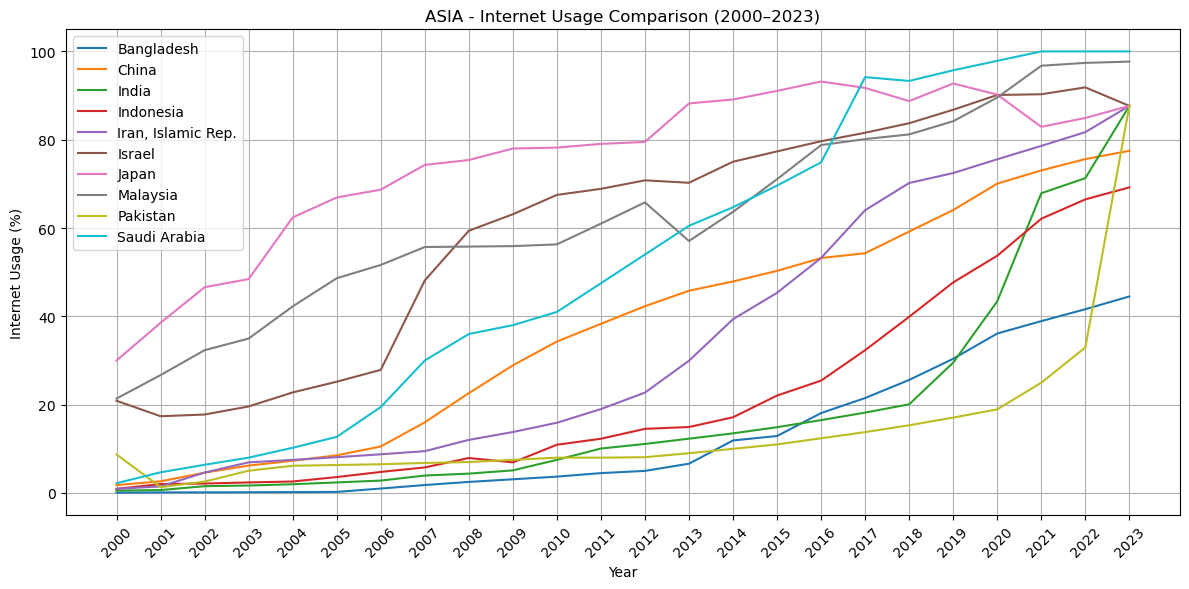

In [24]:
#Asia
asia_countries  = ["Bangladesh","China","India","Indonesia","Iran, Islamic Rep.","Israel","Japan","Malaysia","Pakistan","Saudi Arabia"]
plt.figure(figsize=(12, 6))
for country in asia_countries:
    row = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:]
    plt.plot(df_combined.columns[1:], row.values.flatten(), label=country)

plt.title("ASIA - Internet Usage Comparison (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Internet Usage (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

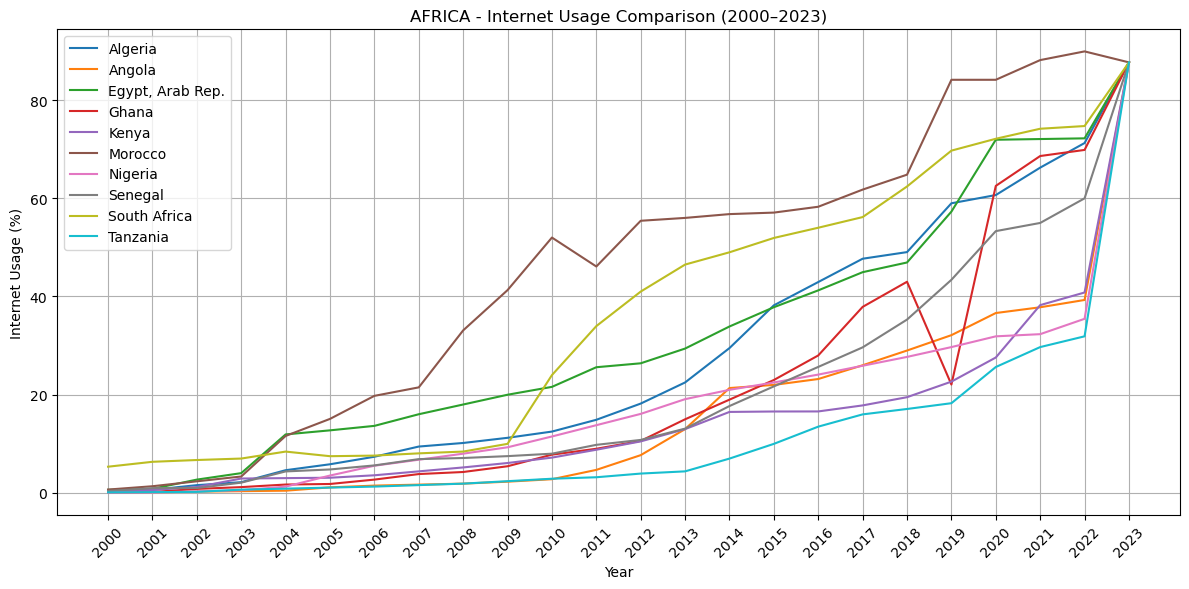

In [25]:
#Africa 
africa_countries = ["Algeria","Angola","Egypt, Arab Rep.","Ghana","Kenya","Morocco","Nigeria","Senegal","South Africa","Tanzania"]

plt.figure(figsize=(12, 6))
for country in africa_countries:
    row = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:]
    plt.plot(df_combined.columns[1:], row.values.flatten(), label=country)

plt.title("AFRICA - Internet Usage Comparison (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Internet Usage (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

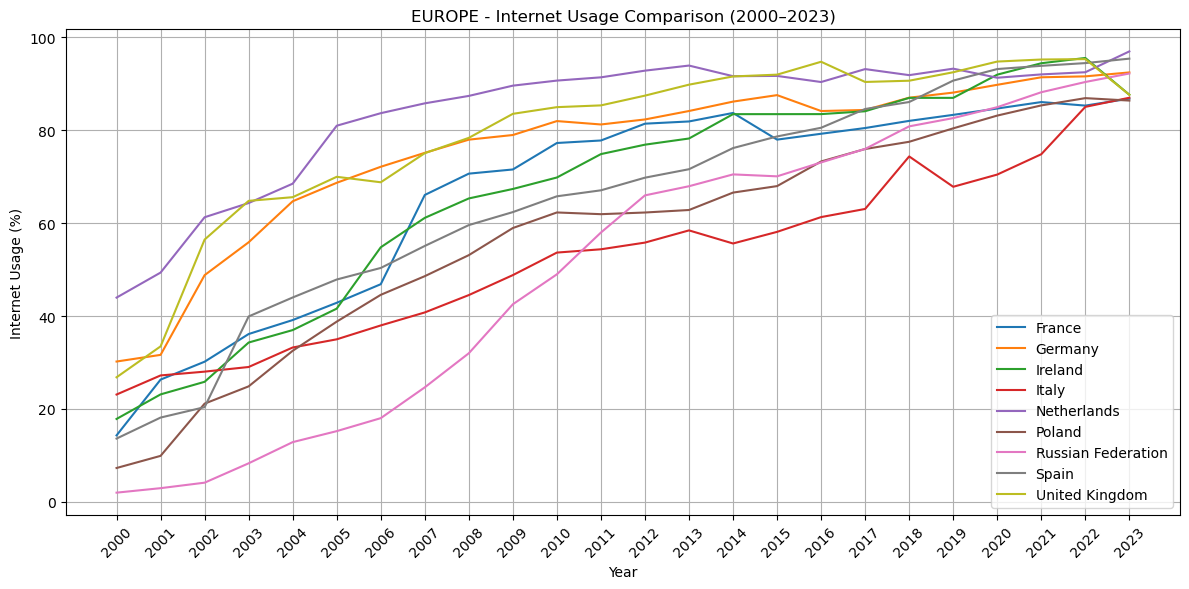

In [26]:
# Europe
europe_countries = ["France","Germany","Ireland","Italy","Netherlands","Poland","Russian Federation","Spain","United Kingdom"]

plt.figure(figsize=(12, 6))
for country in europe_countries:
    row = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:]
    plt.plot(df_combined.columns[1:], row.values.flatten(), label=country)

plt.title("EUROPE - Internet Usage Comparison (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Internet Usage (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

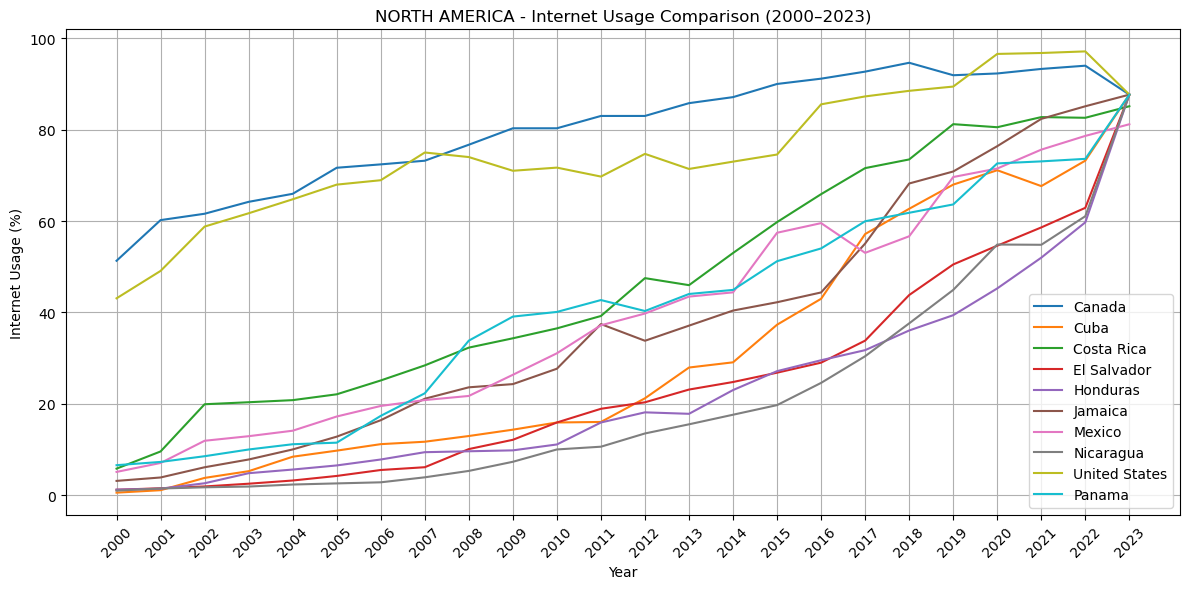

In [27]:
# North America
north_america_countries = ["Canada","Cuba","Costa Rica","El Salvador","Honduras","Jamaica","Mexico","Nicaragua","United States","Panama"]
plt.figure(figsize=(12, 6))
for country in north_america_countries:
    row = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:]
    plt.plot(df_combined.columns[1:], row.values.flatten(), label=country)

plt.title("NORTH AMERICA - Internet Usage Comparison (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Internet Usage (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

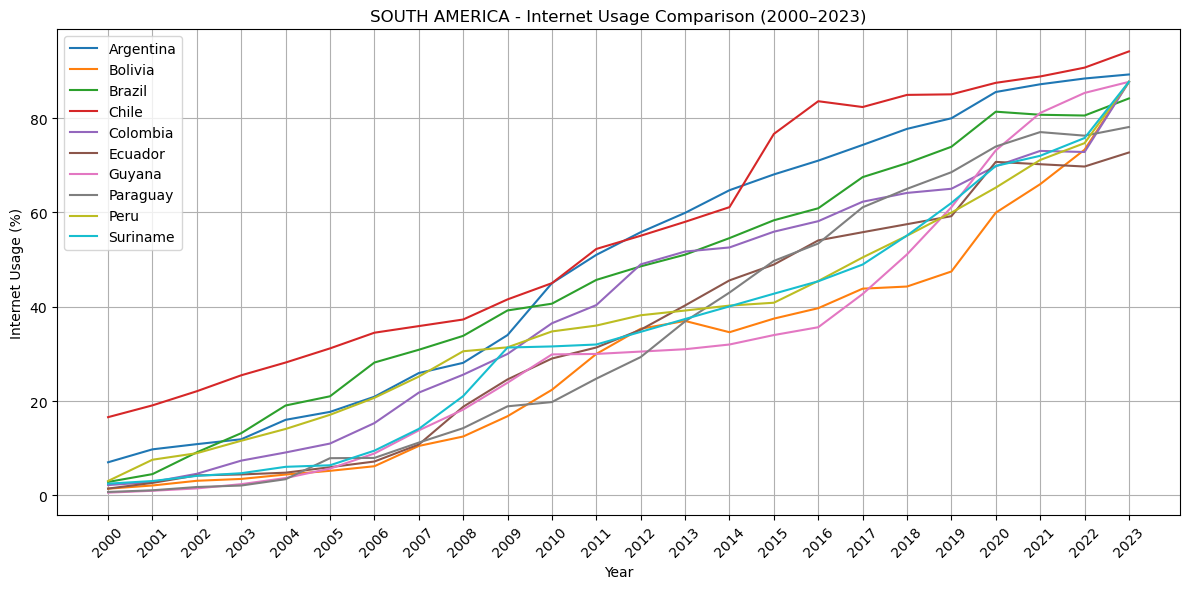

In [28]:
# South America
south_america_countries = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay","Peru","Suriname"]

plt.figure(figsize=(12, 6))
for country in south_america_countries:
    row = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:]
    plt.plot(df_combined.columns[1:], row.values.flatten(), label=country)

plt.title("SOUTH AMERICA - Internet Usage Comparison (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Internet Usage (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

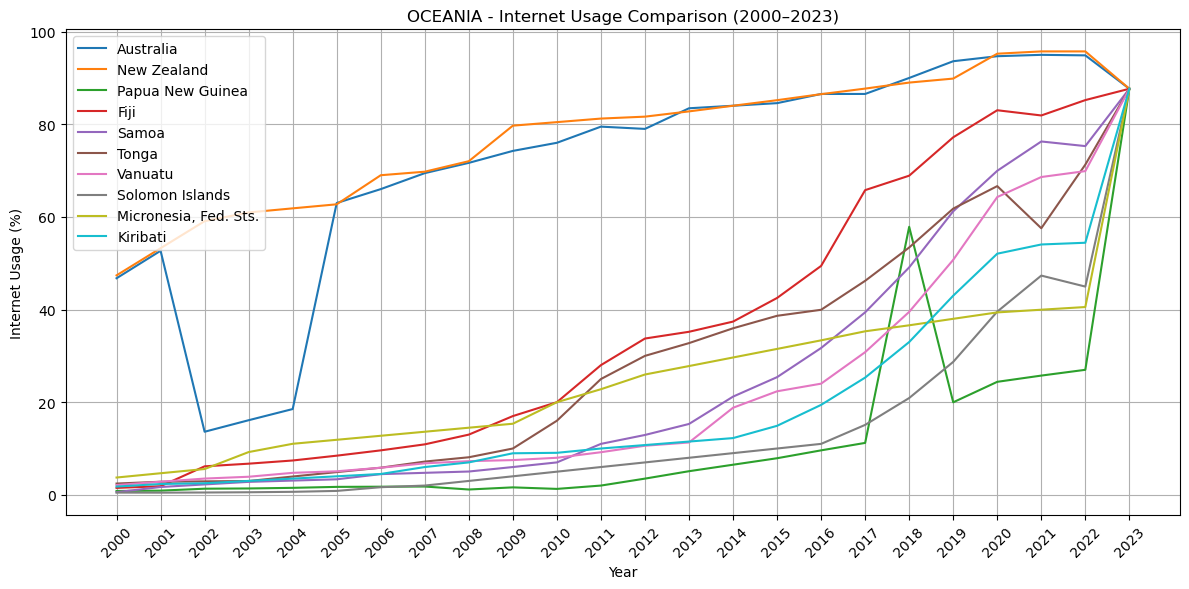

In [29]:
# Oceania
oceania_countries = ["Australia", "New Zealand", "Papua New Guinea", "Fiji", "Samoa","Tonga","Vanuatu","Solomon Islands","Micronesia, Fed. Sts.","Kiribati"]

plt.figure(figsize=(12, 6))
for country in oceania_countries:
    row = df_combined[df_combined.iloc[:, 0] == country].iloc[:, 1:]
    plt.plot(df_combined.columns[1:], row.values.flatten(), label=country)

plt.title("OCEANIA - Internet Usage Comparison (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Internet Usage (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Merge the two DataFrames
df_combined = pd.concat([df_countries, df_years], axis=1)

# Rename the first column to "Country"
df_combined.rename(columns={df_combined.columns[0]: "Country"}, inplace=True)

# Melt the DataFrame to long format
df_long = df_combined.melt(id_vars="Country", var_name="Year", value_name="Internet_Usage")

# Convert Year to integer if needed
df_long["Year"] = df_long["Year"].astype(int)

# View the first few rows
print(df_long.head())


       Country  Year  Internet_Usage
0  Afghanistan  2000        8.732304
1      Albania  2000        0.114097
2      Algeria  2000        0.491706
3      Andorra  2000       10.538800
4       Angola  2000        0.105046


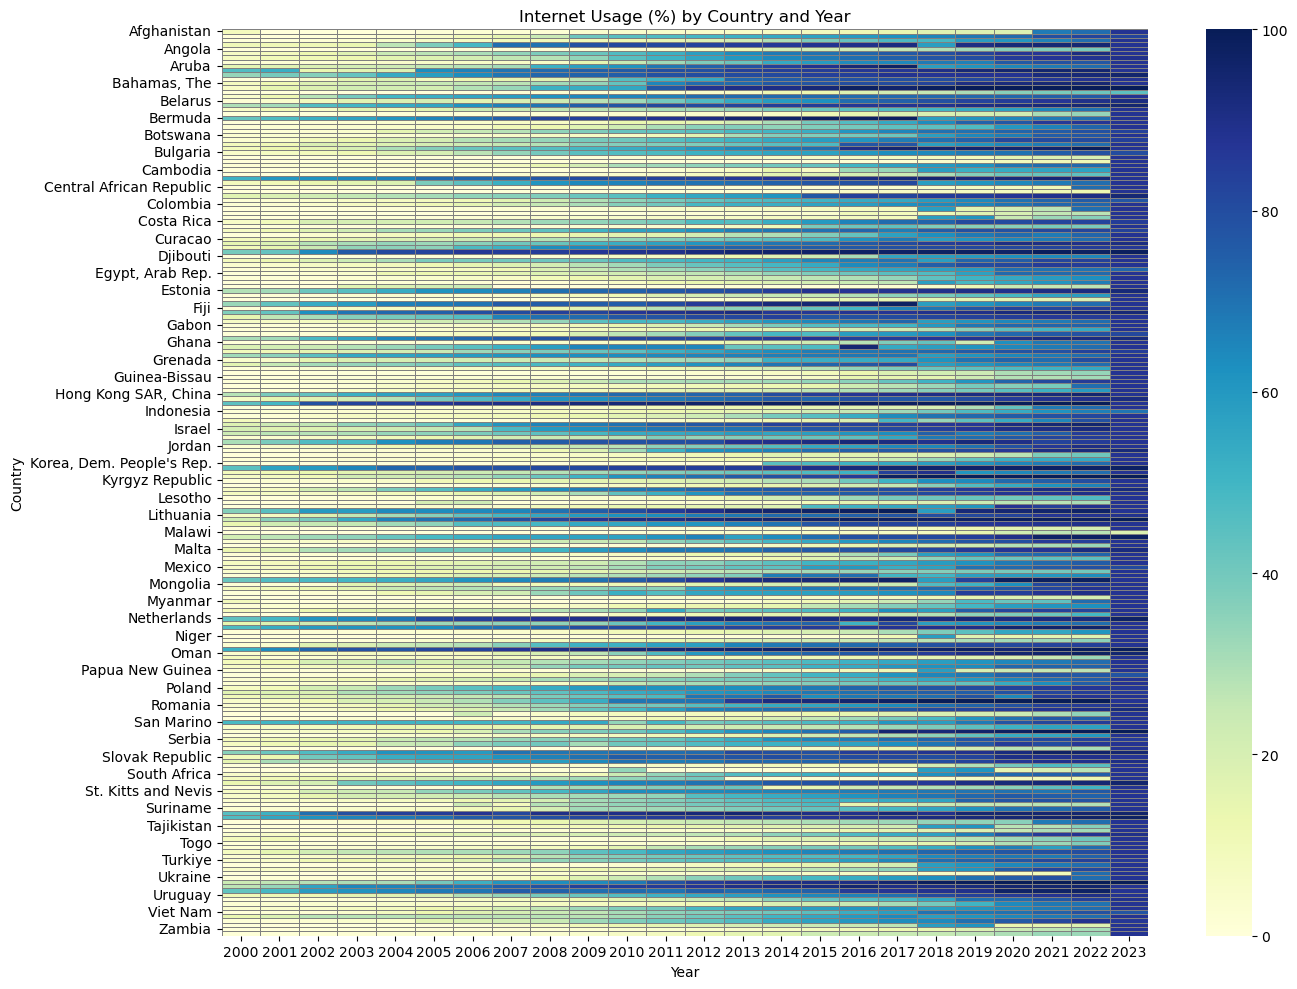

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for heatmap (countries as rows, years as columns)
df_heatmap = df_long.pivot(index="Country", columns="Year", values="Internet_Usage")

plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Internet Usage (%) by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


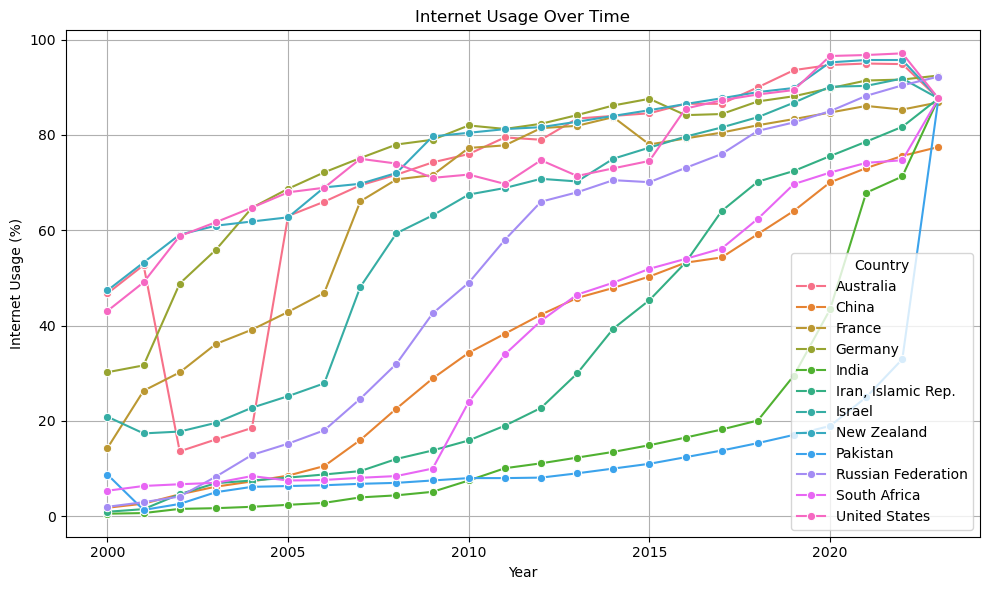

In [32]:
# Filter for selected countries
selected = ["Australia","China","France","Germany","India","Iran, Islamic Rep.","Israel","New Zealand","Pakistan","Russian Federation","South Africa","United States"]

df_selected = df_long[df_long["Country"].isin(selected)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_selected, x="Year", y="Internet_Usage", hue="Country", marker="o")
plt.title("Internet Usage Over Time")
plt.ylabel("Internet Usage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
